In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


seed=42

In [33]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [34]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [35]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [37]:
clf = GaussianNB()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat = clf.predict(x_val_scaled)

accuracy = accuracy_score(y_val, y_hat)
confusion = confusion_matrix(y_val, y_hat)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.88
Confusion Matrix:
[[1463   54]
 [ 165  121]]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
res = []

for var_smoothing in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    clf = GaussianNB(var_smoothing=var_smoothing)
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    clf.fit(x_train_scaled, y_train)

    x_val_scaled = scaler.transform(x_val)
    y_hat = clf.predict(x_val_scaled)

    accuracy = accuracy_score(y_val, y_hat)
    precision = precision_score(y_val, y_hat)
    recall = recall_score(y_val, y_hat)
    f1 = f1_score(y_val, y_hat)

    print(f'{var_smoothing=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
    res.append({
        'var_smoothing': var_smoothing,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

var_smoothing=0.001, accuracy=0.8790904048807543, precision=0.6954022988505747, recall=0.4230769230769231, f1=0.5260869565217391
var_smoothing=0.004641588833612777, accuracy=0.8790904048807543, precision=0.6976744186046512, recall=0.4195804195804196, f1=0.5240174672489084
var_smoothing=0.021544346900318832, accuracy=0.8796450360510261, precision=0.7090909090909091, recall=0.4090909090909091, f1=0.5188470066518848
var_smoothing=0.1, accuracy=0.8796450360510261, precision=0.7284768211920529, recall=0.38461538461538464, f1=0.5034324942791762
var_smoothing=0.46415888336127775, accuracy=0.8652246256239601, precision=0.8524590163934426, recall=0.18181818181818182, f1=0.2997118155619597
var_smoothing=2.154434690031882, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=10.0, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=46.41588833612773, accuracy=0.841375485302274, precision=0.0, recall=0.0, f1=0.0
var_smoothing=215.44346900318823, accur

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arra

In [39]:
res_df = pd.DataFrame(res)
sorted_df = res_df.sort_values('Recall', ascending=False)
sorted_df

,var_smoothing,Accuracy,Precision,Recall,F1-score
0,0.001000,0.879090,0.695402,0.423077,0.526087
1,0.004642,0.879090,0.697674,0.419580,0.524017
2,0.021544,0.879645,0.709091,0.409091,0.518847
3,0.100000,0.879645,0.728477,0.384615,0.503432
4,0.464159,0.865225,0.852459,0.181818,0.299712
5,2.154435,0.841375,0.000000,0.000000,0.000000
6,10.000000,0.841375,0.000000,0.000000,0.000000
7,46.415888,0.841375,0.000000,0.000000,0.000000
8,215.443469,0.841375,0.000000,0.000000,0.000000
9,1000.000000,0.841375,0.000000,0.000000,0.000000


In [40]:
res_df.iloc[res_df.Recall.argmax()]

var_smoothing    0.001000
Accuracy         0.879090
Precision        0.695402
Recall           0.423077
F1-score         0.526087
Name: 0, dtype: float64

In [41]:
var_smoothing = 0.001000

In [42]:
print(f'Naive Bayes,{var_smoothing=}')
clf = GaussianNB(var_smoothing=var_smoothing)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat_val = clf.predict(x_val_scaled)
accuracy_val = accuracy_score(y_val, y_hat_val)
precision_val = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy_val=}, {recall=}')


Naive Bayes,var_smoothing=0.001
VAL: accuracy_val=0.8790904048807543, recall=0.4230769230769231


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1464   53]
 [ 165  121]]


Text(0.5, 23.52222222222222, 'Prediction')

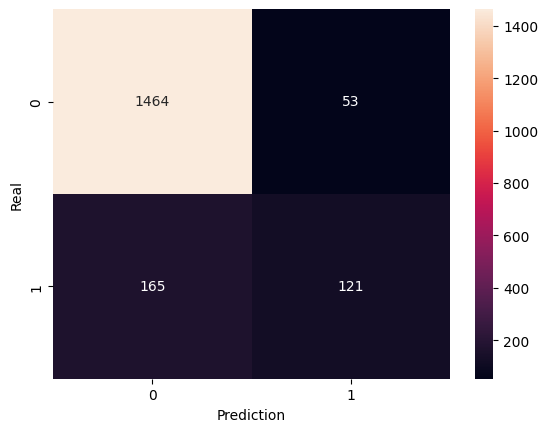

In [44]:
sns.heatmap(confusion_matrix(y_val, y_hat_val), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

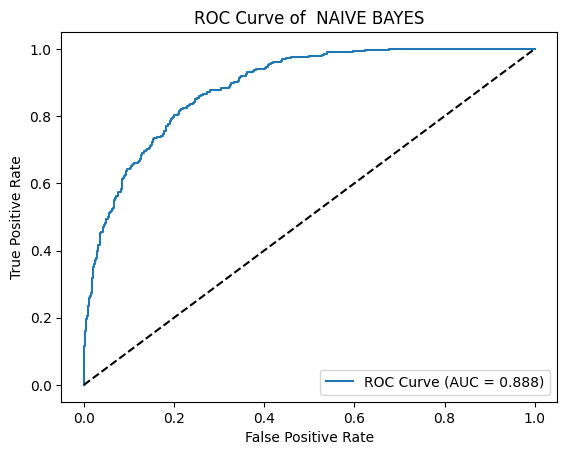

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_score = clf.predict_proba(x_val_scaled)
y_score = pd.DataFrame(y_score[:,1])
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_score)

# Calcolo dell'area sotto la curva ROC (AUC)
auc = roc_auc_score(y_val, y_score)

# Plot della curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of  NAIVE BAYES')
plt.legend(loc='lower right')
plt.show()